In [189]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
label = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[0]
image = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
original_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
og_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\rendered.npz", allow_pickle=True)
#print(label)
#print(len(label))
data_params = ['reward', 'observation$compassAngle', 'observation$inventory$dirt', 'action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera', 'action$place']

print([len(og_label[i]) for i in data_params[3:]])
print(label.shape)
print(label)
actual_frames = len(og_label["reward"])
#image = image[-actual_frames:]
print(image.shape)


file_names = [folder_name for folder_name in os.listdir(path+"\\MineRLNavigateDense-v0")]

train_data = file_names[:1000]
#train_data = file_names[:2]
valid_data = file_names[160:190]

#idx = 0

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size):
        self.batch_size = batch_size
        self.data = data
        self.video_file_no = 0
        self.video_frame_no = batch_size

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
    
    '''def __next__(self):
        return self.getitem()'''

    def __getitem__(self, idx):
        #batch_x = self.data[idx * self.batch_size : (idx+1) * self.batch_size]
        video = self.data[self.video_file_no]
        
        image_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[0]])
        label_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        label_part_2 = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0]
        print(label_part_2.shape)
        
        print(image_part.shape)
        no_of_frames = int(np.array(image_part[0]).shape[0]/12288)
        image_part = np.array(image_part[0]).reshape(no_of_frames, 64, 64, 3)[-label_part[0].shape[0]:]
        image_part = np.asarray(image_part[idx * self.batch_size : (idx+1) * self.batch_size]).astype("float32")
        image_part = image_part.reshape(-1, 64, 64, 3)
        plt.imshow(np.array(image_part).astype(np.uint8)[-1])
        plt.show()
        
        #observations
        x_label = label_part_2[:3]
        #actions
        y_label = label_part_2[3:]
        
        #compass angle
        x_label[1] = x_label[1]/180
        #rewards without the last frame
        x_label[0] = x_label[0][:-1]
        #objects placed
        x_label[2] = x_label[2]/64
        
        #camera action
        y_label[-2] = y_label[-2]/180
        
        for each in range(len(y_label[-1])):
            checking = y_label[-1][each]
            if checking == "none":
                y_label[-1][each] = 0
            else:
                y_label[-1][each] = 1
        
        camera_x = []
        camera_y = []
        
        for j in range(len(y_label[-2])):
            camera_x.append(y_label[-2][j][0])
            camera_y.append(y_label[-2][j][1])
        
        place = y_label[-1]
        y_label = y_label[:-2]
        final_array = []
        final_x = []
        
        for x in y_label:
            final_array.append(x)
            
        final_array.append(np.array(camera_x))
        final_array.append(np.array(camera_y))
        final_array.append(place)
        
        print(np.array(image_part).dtype)
        print(np.array(image_part).shape)
        #print(np.array([image_part, label_part]).shape)
        for x in range(len(final_array[-1])):
            final_array[-1][x] = int(x)
        
        for i in range(len(final_array)):
            final_array[i] = final_array[i][self.video_frame_no]
            print(final_array[i])
        
        
        for i in range(len(x_label)):
            x_label[i] = x_label[i][self.video_frame_no]
            print(x_label[i])
        
        final_array[-1] = int(final_array[-1])
        self.video_frame_no += batch_size
        if self.video_frame_no > no_of_frames and len(self.data) != self.video_file_no:
            self.video_file_no += 1
        
        print(np.array(image_part).shape)
        print(np.array(final_array).shape)
        print(np.array(x_label).shape)
        print(np.asarray(x_label).shape)
        print("reached the end")
        return [np.asarray(image_part).astype(np.float32), np.asarray(x_label).astype(np.float32).reshape(-1,3)], np.asarray(final_array).astype(np.float32).reshape(-1,11)
    
batch_size = 1

training_gen = DataGenerator(train_data, batch_size)
valid_gen = DataGenerator(valid_data, batch_size)

[1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792]
(16129,)
[0 0 0 ... 0 0 0]
(1832, 64, 64, 3)


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
import tqdm
import os

(None, 25)
(None, 11)
(13,)
(1, 22511616)


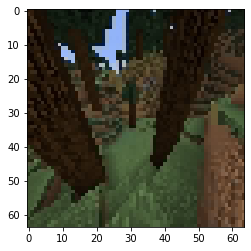

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
199
-0.016578134
-0.005661480000000236
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
(13,)
(1, 22511616)


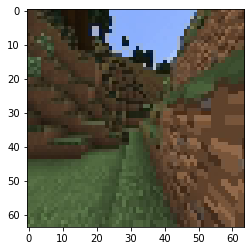

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
200
-0.011059765
-0.005660540000000462
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 1/20 [>.............................] - ETA: 0s - loss: 0.0320 - accuracy: 1.0000(13,)
(1, 22511616)


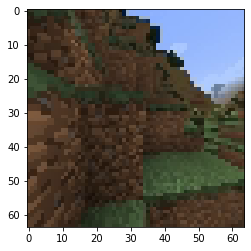

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
201
-0.007376586
-0.005660000000000309
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 2/20 [==>...........................] - ETA: 23s - loss: 0.0160 - accuracy: 1.0000(13,)
(1, 22511616)


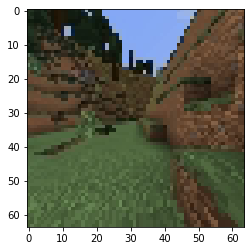

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
202
-0.0049192393
-0.005659600000000056
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 3/20 [===>..........................] - ETA: 31s - loss: 0.0107 - accuracy: 1.0000(13,)
(1, 22511616)


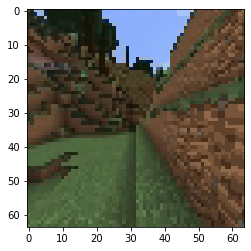

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.020833334
0.0058333077
203
-0.0032801663
-0.005659100000000055
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 4/20 [=====>........................] - ETA: 33s - loss: 34.9740 - accuracy: 1.0000(13,)
(1, 22511616)


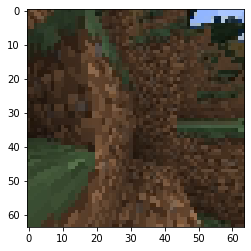

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.03833332
0.0074999915
204
-0.0021870767
-0.005867200000000139
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 5/20 [======>.......................] - ETA: 33s - loss: 79.8697 - accuracy: 1.0000(13,)
(1, 22511616)


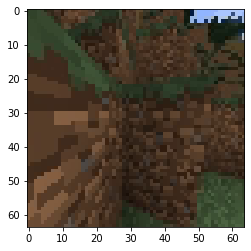

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.021666676
-0.0016666836
205
-0.0014581841
-0.006214400000000195
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 6/20 [========>.....................] - ETA: 31s - loss: 86.2300 - accuracy: 1.0000(13,)
(1, 22511616)


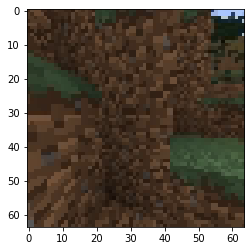

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.029999988
0.0016666836
206
-0.00097218185
-0.00623749999999998
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 7/20 [=========>....................] - ETA: 30s - loss: 111.7681 - accuracy: 1.0000(13,)
(1, 22511616)


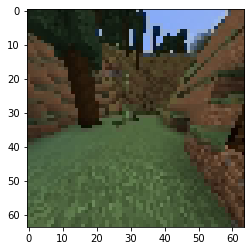

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.031666692
0.0066666496
207
-0.0006481475
-0.006461199999999836
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 8/20 [===========>..................] - ETA: 28s - loss: 168.2692 - accuracy: 1.0000(13,)
(1, 22511616)


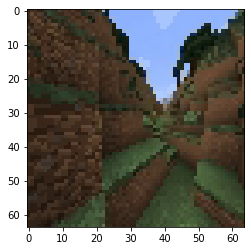

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.02333336
0.0050000083
208
-0.00043211
-0.006610399999999572
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
 9/20 [============>.................] - ETA: 26s - loss: 203.8734 - accuracy: 1.0000(13,)
(1, 22511616)


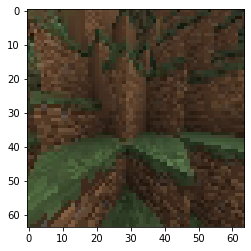

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
209
-0.00028807853
-0.006917999999999817
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
10/20 [==============>...............] - ETA: 24s - loss: 183.4861 - accuracy: 1.0000(13,)
(1, 22511616)


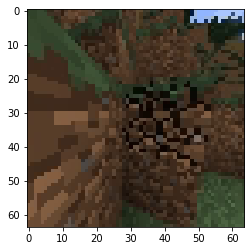

float32
(1, 64, 64, 3)
0
0
0
0
1
0
0
0
0.0
0.0
210
-0.001565748
-0.007123199999999643
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
11/20 [===============>..............] - ETA: 21s - loss: 4518.2451 - accuracy: 1.0000(13,)
(1, 22511616)


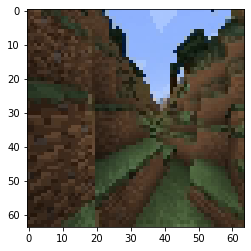

float32
(1, 64, 64, 3)
0
0
0
0
1
0
0
0
0.0
0.0
211
-0.0024557114
-0.007259799999999612
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
12/20 [=================>............] - ETA: 19s - loss: 9657.9092 - accuracy: 1.0000(13,)
(1, 22511616)


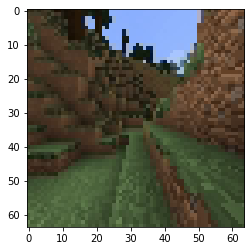

float32
(1, 64, 64, 3)
0
0
0
0
1
0
0
0
0.0
0.0
212
-0.0030029458
-0.007351200000000012
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
13/20 [==================>...........] - ETA: 17s - loss: 15159.9160 - accuracy: 1.0000(13,)
(1, 22511616)


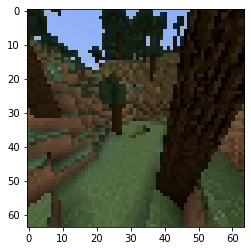

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
213
-0.003120165
-0.007411999999999984
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
14/20 [====================>.........] - ETA: 15s - loss: 14077.0645 - accuracy: 1.0000(13,)
(1, 22511616)


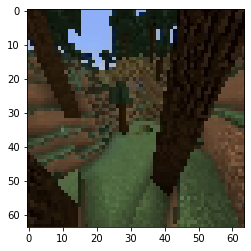

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
214
-0.0027702642
-0.007452479999999974
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
15/20 [=====================>........] - ETA: 12s - loss: 13138.5938 - accuracy: 1.0000(13,)
(1, 22511616)


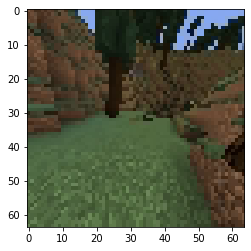

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
215
-0.001997869
-0.0074796600000000685
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
16/20 [=======================>......] - ETA: 10s - loss: 12317.4316 - accuracy: 1.0000(13,)
(1, 22511616)


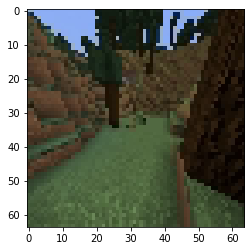

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
216
-0.0009092908
-0.00749759999999987
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
17/20 [========================>.....] - ETA: 7s - loss: 11592.8770 - accuracy: 1.0000 (13,)
(1, 22511616)


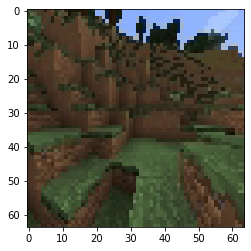

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
217
0.00035424862
-0.00750945999999999
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
18/20 [==========================>...] - ETA: 5s - loss: 10948.8281 - accuracy: 1.0000(13,)
(1, 22511616)


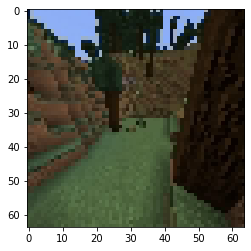

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
218
0.001634331
-0.007517599999999902
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
19/20 [===========================>..] - ETA: 2s - loss: 10372.5742 - accuracy: 1.0000(13,)
(1, 22511616)


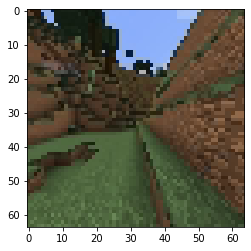

float32
(1, 64, 64, 3)
0
0
0
0
0
0
0
0
0.0
0.0
219
0.0027669081
-0.007522800000000037
0.015625
(1, 64, 64, 3)
(11,)
(3,)
(3,)
reached the end
20/20 [==============================] - ETA: 0s - loss: 9853.9453 - accuracy: 1.0000 

KeyboardInterrupt: 

In [198]:
input_1 = tf.keras.layers.Input(shape=[64,64,3])
input_2 = tf.keras.layers.Input(shape=[3])

conv_1 = tf.keras.layers.Conv2D(25, 3, activation="relu", padding="same")(input_1)
flatten = tf.keras.layers.Flatten()(conv_1)

dense_1 = tf.keras.layers.Dense(25, activation="relu")(flatten)
print(dense_1.shape)
stats = tf.keras.layers.Dense(11, activation="relu")(input_2)
print(stats.shape)
dense_and_stats = tf.keras.layers.concatenate([dense_1, stats])
outputs = tf.keras.layers.Dense(11, activation="softmax")(dense_and_stats)
RESHAPE = tf.reshape(outputs, [1, 11])

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[outputs])
    
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics="accuracy")
    
model.fit_generator(generator = training_gen,
                    steps_per_epoch = 20,
                    epochs = 1,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = 5)